In [4]:
import tkinter as Tkinter

def tester():

    class window(Tkinter.Tk):
        def __init__(self,parent):
            Tkinter.Tk.__init__(self,parent)
            self.parent = parent
            self.initialize()

        def initialize(self):
            print(self.grid())
            self.button1 = Tkinter.Button(self,text=u"Button")
            self.button1.grid(padx=5,pady=5)

            self.button2 = Tkinter.Button(self,text=u"Change",command=self.colourer)
            self.button2.grid(column=1,row=0,pady=5)

            self.button3 = Tkinter.Button(self,text=u"Disabled",state='disabled')
            self.button3.grid(column=2,row=0,pady=5)



        def colourer(self):
            self.button1.configure(bg='red')
#           self.button1.config(bg='red')  -- this gives same error
#           self.button3.configure(state='normal')  -- as does this
    if __name__ == "__main__":
        app = window(None)
        app.title('Tester')
        app.mainloop()

tester()

None


In [64]:
import numpy as np
Np = 1500*50
a1 = np.random.random(Np).tolist()
a2 = np.random.random(Np).tolist()

x1 = np.random.random(Np)
x2 = np.random.random(Np)


In [69]:
a1 = [i for i in a1 if i > 0.5]

In [66]:
x1 = x1[x1>0.5]

In [100]:
import numba as nb
from numba import jit
import time

@jit("i8(f8[:],f8)")
def popout(x,val):
    """move elements that do not correspond to the condition
    x > val to the end of the table.
    
    Inputs :
    =========
    x (In and out) : array of float64
    
    val: float64 the threshold
    
    return:
    =======
    compt: int64 number of elements put at the end of x
    
    """
    
    #init the parameters
    compt = 0
    N = len(x)
    i = N
    #linear search from the end of the table
    while i > 0:
        if x[i] > val: #Condition to move the element at the end
            #exchange the current element with the last
            tmp = x[N - compt]
            x[N - compt] = x[i]
            x[i] = tmp
            compt += 1
        i -= 1
        
    return compt

@jit("f8[:](f8[:],f8)")
def poplist(x,val):
    a = [i for i in x if i > val]
    return np.array(a)

In [84]:
compt = popout(x2,0.5)

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt


Numba popout: 1.3827 s
Numpy mask : 1.5138 s
  list     : 1.9386 s


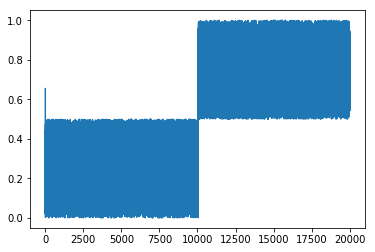

In [103]:
Np = 2000*10
Ntests = 5000
start_time = time.time()
for i in range(Ntests):
    x = np.random.random(Np)
    compt = popout(x,0.5)
t =time.time()-start_time
print(f"Numba popout: {t:2.4f} s")
plt.plot(x)

start_time = time.time()
for i in range(Ntests):
    x = np.random.random(Np)
    x = x[x>0.5]
t =time.time()-start_time
print(f"Numpy mask : {t:2.4f} s")

start_time = time.time()
for i in range(Ntests):
    x = np.random.random(Np)
    x = poplist(x,0.5)

t =time.time()-start_time
print(f"  list     : {t:2.4f} s")